# Step 1: Reading and Understanding the data

In [117]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [118]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max.columns',20)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [119]:
#Reading the bike data csv file and displaying few rows
bike_data = pd.read_csv(r"C:\Users\Deepa\Downloads\day (2).csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspecting aspects of the dataframe:

In [120]:
bike_data.shape

(730, 16)

In [121]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [122]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [123]:
print(100*(round(bike_data.isnull().sum(axis=0)/len(bike_data))))

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


## Step 2: Understanding and Visualizing the data

In [124]:
#season : season (1:spring, 2:summer, 3:fall, 4:winter)
#Replacing Numeric Categorical with String values:
bike_data['season'] = bike_data['season'].replace(1,'spring')
bike_data['season'] = bike_data['season'].replace(2,'summer')
bike_data['season'] = bike_data['season'].replace(3,'fall')
bike_data['season'] = bike_data['season'].replace(4,'winter')
bike_data['season'].value_counts(normalize = True)


fall      0.257534
summer    0.252055
spring    0.246575
winter    0.243836
Name: season, dtype: float64

In [125]:
#Replacing Numeric Categorical with String values:

bike_data['weathersit'] = bike_data['weathersit'].replace(1,'Partly Cloudy')
bike_data['weathersit'] = bike_data['weathersit'].replace(2,'Misty')
bike_data['weathersit'] = bike_data['weathersit'].replace(3,'Light Rain')
bike_data['weathersit'] = bike_data['weathersit'].replace(4,'Heavy Rain')
bike_data['weathersit'].value_counts(normalize=True)

Partly Cloudy    0.634247
Misty            0.336986
Light Rain       0.028767
Name: weathersit, dtype: float64

In [126]:
##Replacing Numeric Categorical with String values:

bike_data['weekday'] = bike_data['weekday'].map({0: 'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
bike_data['weekday'].value_counts(normalize=True)

Monday       0.143836
Sunday       0.143836
Saturday     0.143836
Thursday     0.142466
Tuesday      0.142466
Friday       0.142466
Wednesday    0.141096
Name: weekday, dtype: float64

In [127]:
#Replacing Numeric Categorical with String values:
bike_data['mnth'] = bike_data['mnth'].map({1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})
bike_data['mnth'].value_counts(normalize=True)

August    0.084932
March     0.084932
July      0.084932
Jan       0.084932
Dec       0.084932
Oct       0.084932
May       0.084932
June      0.082192
Nov       0.082192
April     0.082192
Sept      0.082192
Feb       0.076712
Name: mnth, dtype: float64

In [128]:
#Workingday variable - In binary format, no need of transformation and creation of dummy variables explicitly

bike_data['workingday'].value_counts(normalize=True)

1    0.683562
0    0.316438
Name: workingday, dtype: float64

In [129]:
#Holiday variable - In binary format, no need of transformation and creation of dummy variables explicitly

bike_data['holiday'].value_counts(normalize=True)

0    0.971233
1    0.028767
Name: holiday, dtype: float64

In [130]:
#Yr variable - In binary format, no need of transformation and creation of dummy variables explicitly

bike_data['yr'].value_counts(normalize=True)

1    0.5
0    0.5
Name: yr, dtype: float64

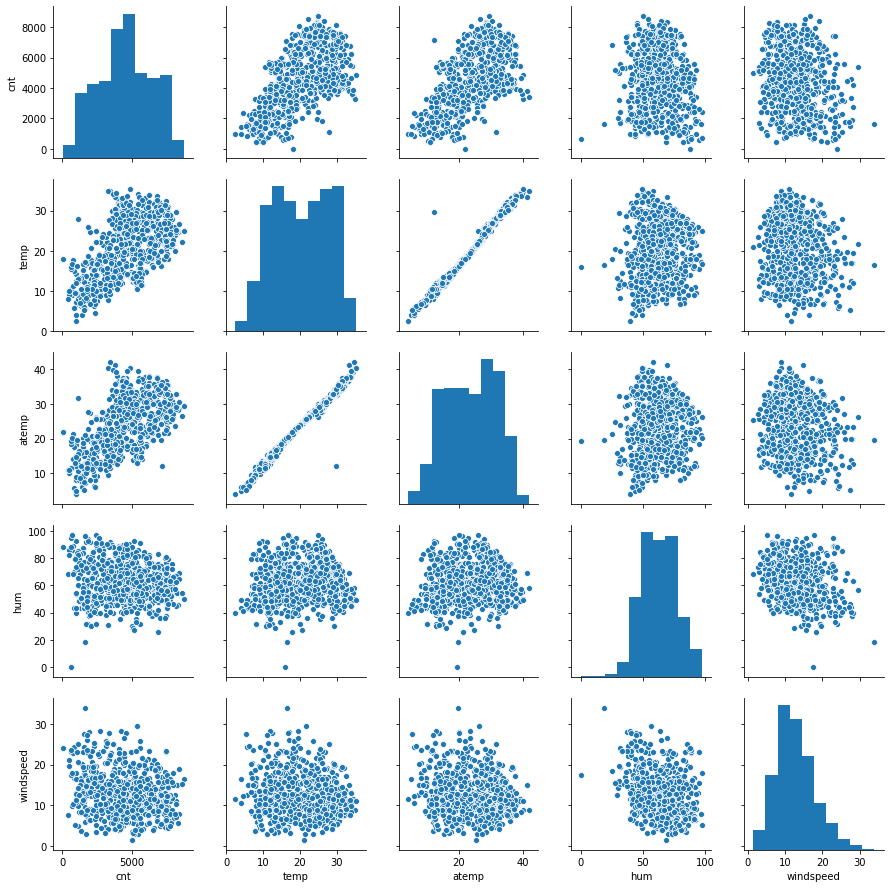

In [131]:
#Visualizing numeric varibles: 'Cnt' seems to have some linear relationship with temp and atemp variables

sns.pairplot(bike_data, vars = ['cnt','temp','atemp','hum','windspeed'])
plt.show()


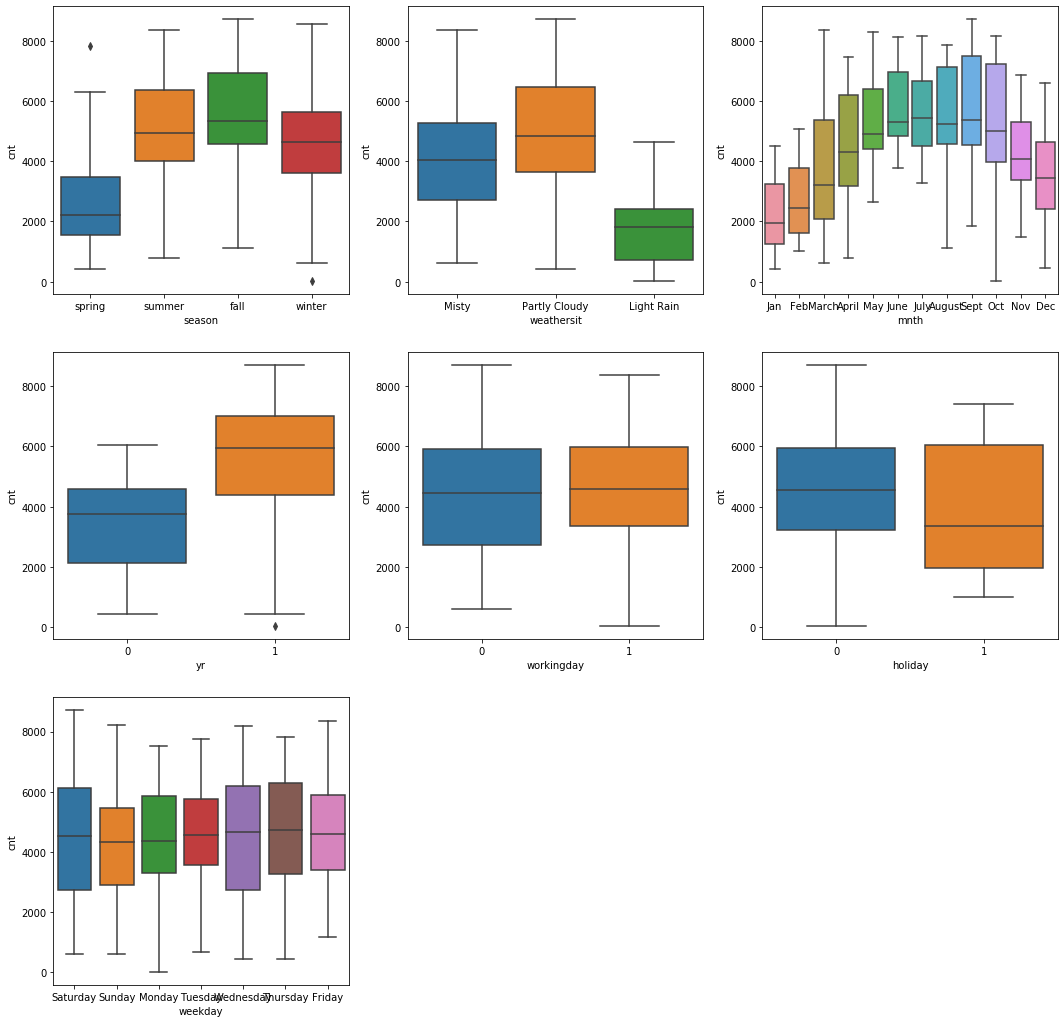

In [132]:
#Visualizing Categorical Variables
plt.figure(figsize = (20,18))

plt.subplot(331)
sns.boxplot(data = bike_data, y = 'cnt' , x = 'season')

plt.subplot(332)
sns.boxplot(data = bike_data, y = 'cnt', x = 'weathersit')

plt.subplot(333)
sns.boxplot(data = bike_data, y = 'cnt', x = 'mnth')

plt.subplot(334)
sns.boxplot(data = bike_data, y = 'cnt', x = 'yr')

plt.subplot(335)
sns.boxplot(data = bike_data, y = 'cnt', x = 'workingday')

plt.subplot(336)
sns.boxplot(data = bike_data, y = 'cnt', x = 'holiday')

plt.subplot(337)
sns.boxplot(data = bike_data, y = 'cnt', x = 'weekday')


plt.show()

# For Fall season rental business is working quite well
# Weather wise people seem to prefer 'Partly Cloudy' Weather compared to others.
# Month wise Sept and July are more popular
# Year 2019 represented by 1 is have made more business comapred to 2018.
# Median of being a working day or not are closer to each other and thus this variable do not critically influence the model
# Non holidays are popular in renting bikes and more rentals happen during non holidays

## Step 3: Data Preparation

In [133]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Monday,1,Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tuesday,1,Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wednesday,1,Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [134]:
#Creating dummies for 'weekday' variable, storing it in 'weekday', dropping first column using drop_first = True

weekday = pd.get_dummies(bike_data['weekday'],drop_first = True)
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [135]:
#Creating dummies for 'season' variable, storing it in 'season', dropping first column using drop_first = True

season = pd.get_dummies(bike_data['season'], drop_first = True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [136]:
# Creating dummies for 'weathersit' variable, storing it in 'weather', dropping first column using drop_first = True

weather = pd.get_dummies(bike_data['weathersit'],drop_first = True)
weather.head()

,Misty,Partly Cloudy
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [137]:
#Creating dummies for 'mnth' variable, storing it in 'month', dropping first column using drop_first = True

month = pd.get_dummies(bike_data['mnth'],drop_first = True)
month.head()

,August,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [138]:
# Concatenating newly created dummy variable columns to the bike_data Df

bike_data = pd.concat([bike_data,weather,weekday,month,season],axis =1)
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,July,June,March,May,Nov,Oct,Sept,spring,summer,winter
0,1,01-01-2018,spring,0,Jan,0,Saturday,0,Misty,14.110847,...,0,0,0,0,0,0,0,1,0,0
1,2,02-01-2018,spring,0,Jan,0,Sunday,0,Misty,14.902598,...,0,0,0,0,0,0,0,1,0,0
2,3,03-01-2018,spring,0,Jan,0,Monday,1,Partly Cloudy,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,spring,0,Jan,0,Tuesday,1,Partly Cloudy,8.200000,...,0,0,0,0,0,0,0,1,0,0
4,5,05-01-2018,spring,0,Jan,0,Wednesday,1,Partly Cloudy,9.305237,...,0,0,0,0,0,0,0,1,0,0


In [139]:
# Dropping the original columns for which dummy variables are created and contanated to original Df

bike_data.drop(['season','weekday','mnth','weathersit'],inplace = True, axis =1)
bike_data.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,July,June,March,May,Nov,Oct,Sept,spring,summer,winter
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,1,0,0
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,1,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,1,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,1,0,0


In [140]:
# Also dropping columns that are not adding value to my analysis

bike_data.drop(['dteday','casual','registered','instant'],inplace=True,axis = 1)


In [141]:
# Inspecting columns after data preparation step

print(bike_data.columns)
bike_data.shape

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Misty', 'Partly Cloudy', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'August', 'Dec', 'Feb', 'Jan',
       'July', 'June', 'March', 'May', 'Nov', 'Oct', 'Sept', 'spring',
       'summer', 'winter'],
      dtype='object')


(730, 30)

## Step 4: Splitting the Data into Training and Testing Set

In [142]:
from sklearn.model_selection import train_test_split


In [143]:
# Splitting: Train data is 70% of the original size of bike_data df and test data is 30% of the original size. 

np.random.seed(0)
df_train,df_test = train_test_split(bike_data, train_size = 0.7,random_state = 100)
print(bike_data.shape)
print(df_train.shape)
print(df_test.shape)


(730, 30)
(510, 30)
(220, 30)


### Scaling:

In [144]:
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Misty,Partly Cloudy,...,July,June,March,May,Nov,Oct,Sept,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,0,0,0,0,0,0,0,1,0,0


In [145]:
#Calling scalar object : Using MinMax Scaling for scaling

scale = MinMaxScaler()

#Numerical Variables for scaling
var = ['temp','atemp','hum','windspeed','cnt']

df_train[var] = scale.fit_transform(df_train[var])

print(df_train.shape)
df_train.head()


(510, 30)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Misty,Partly Cloudy,...,July,June,March,May,Nov,Oct,Sept,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,1,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


In [146]:
# Describing Scaled variables

df_train[var].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


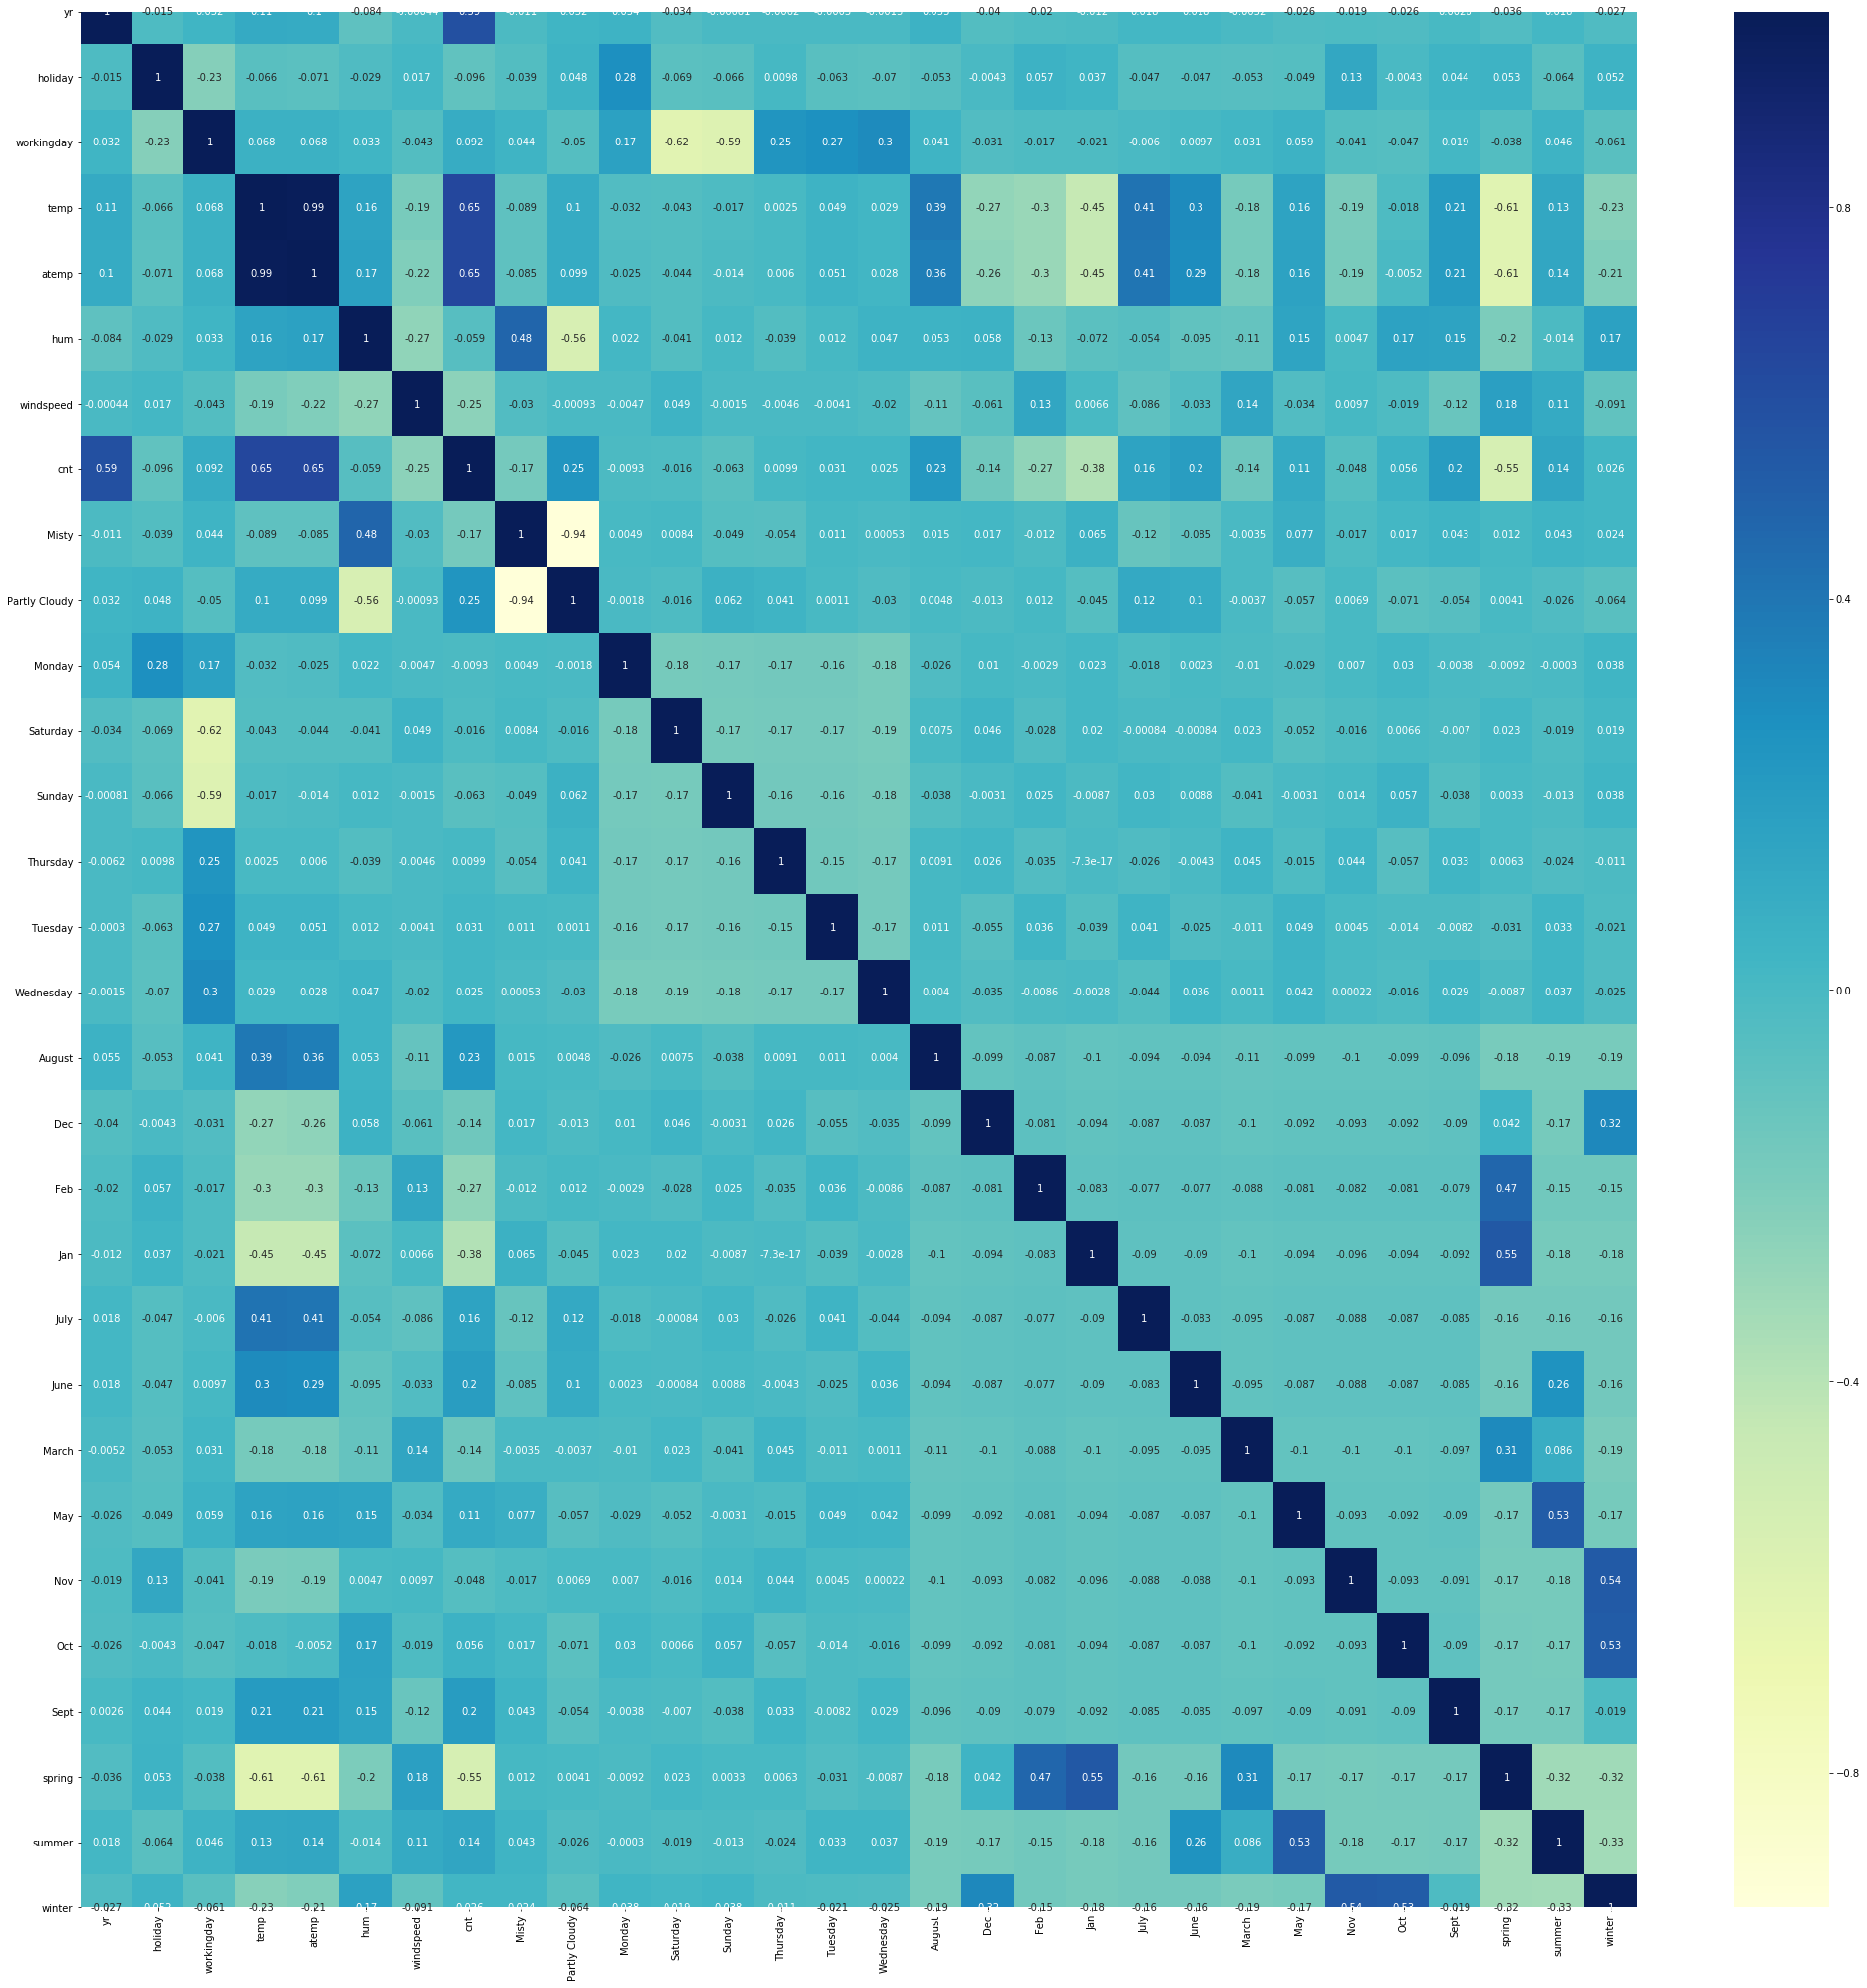

In [147]:
# Let's check the correlation coefficients to see which variables are highly correlated
# We can see that 'cnt' is highly correlated with 'Temp','Yr','Partly Cloudy' variables
# There is high correlation between multiple variables as shown in the heat map

plt.figure(figsize=(35,35))           
sns.heatmap(df_train.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

### Dividing into X and Y sets for the model building

In [148]:
X_train = df_train
y_train = df_train.pop('cnt')

In [149]:
# Checking the data of X_train

X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Misty,Partly Cloudy,Monday,...,July,June,March,May,Nov,Oct,Sept,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,1,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [150]:
# Checking the data of y_train

y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [151]:
bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Misty', 'Partly Cloudy', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'August', 'Dec', 'Feb', 'Jan',
       'July', 'June', 'March', 'May', 'Nov', 'Oct', 'Sept', 'spring',
       'summer', 'winter'],
      dtype='object')

## Step 5: Model Building

In [152]:
# Importing RFE and LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [153]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False  True  True  True  True False  True False
 False False False False False False  True  True False False False False
 False  True  True  True  True]
[ 1  1  1  1  5  1  1  1  1  9  1  8 11 10 12  7  3  4  1  1 14 15  6  2
 13  1  1  1  1]


In [154]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Misty', True, 1),
 ('Partly Cloudy', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 12),
 ('August', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sept', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [155]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Misty',
       'Partly Cloudy', 'Saturday', 'Jan', 'July', 'Sept', 'spring', 'summer',
       'winter'],
      dtype='object')

In [156]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'August', 'Dec', 'Feb', 'June', 'March', 'May', 'Nov', 'Oct'],
      dtype='object')

In [157]:
#set(X_train.columns)-set(X.columns)

## Step 6. Building model using statsmodel, for the detailed statistics

In [158]:
##RFE: Creating X dataframe with RFE selected variables
X = X_train[col]

# Adding a constant variable 
X_train_lm = sm.add_constant(X)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.22e-191
Time:                        14:35:21   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0044      0.048      0.092

In [159]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X_Vif = X
vif['Features'] = X_Vif.columns
vif['VIF'] = [variance_inflation_factor(X_Vif.values, i) for i in range(X_Vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,25.63
3,temp,22.84
7,Partly Cloudy,14.80
6,Misty,9.07
12,spring,5.69
2,workingday,5.42
5,windspeed,4.69
14,winter,4.12
13,summer,3.21
0,yr,2.10


In [160]:
# Removing 'hum' as it has high VIF, no eligible p-value candidates for dropping
# Adding Constant, Running the linear Model and displaying Summary of the newly created model :

X = X_train_lm.drop('hum',axis = 1)

X_train_lm = sm.add_constant(X)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.60e-188
Time:                        14:35:21   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1171      0.039     -2.980      0.003      -0.194      -0.040
yr                0.2345      0.008     29.009      0.000       0.219       0.250
holiday          -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday        0.0464      0.012      3.966      0.000       0.023       0.069
temp              0.4722      0.034     14.005      0.000       0.406       0.538
windspeed        -0.1563      0.025     -6.286      0.000      -0.205      -0.107
Misty             0.2095      0.025      8.499      0.000       0.161       0.258
Partly Cloudy     0.2908      0.024     11.977      0.000       0.243       0.339
Saturday          0.0583      0.015      3.968      0.000       0.029       0.087
Jan              -0.0392      0.018     -2.227      0.026      -0.074      -0.005
July             -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Sept              0.0755      0.017      4.527      0.000       0.043       0.108
spring           -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer            0.0445      0.015      2.967      0.003       0.015       0.074
winter            0.0784      0.017      4.562      0.000       0.045       0.112
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         23.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
# VIF Calculation

vif = pd.DataFrame()
X_Vif = X
X_Vif = X_Vif.drop(['const'],axis=1)
vif['Features'] = X_Vif.columns
vif['VIF'] = [variance_inflation_factor(X_Vif.values, i) for i in range(X_Vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Partly Cloudy,14.79
3,temp,13.96
5,Misty,8.48
2,workingday,5.34
4,windspeed,4.67
11,spring,4.48
12,summer,2.79
13,winter,2.74
0,yr,2.08
7,Saturday,1.99


In [162]:
# Removing 'workingday' as it has high VIF above 5 and 'Temp','Partly Cloudy','Misty' variables seem significant, hence dropping of those variables drop R square immensely which has to be avoided,
# no eligible p-value candidates for dropping
# Adding Constant, Running the linear Model and displaying Summary of the newly created model :

X = X.drop('workingday',axis = 1)

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.48e-186
Time:                        14:35:21   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0739      0.038     -1.928      0.054      -0.149       0.001
yr                0.2347      0.008     28.620      0.000       0.219       0.251
holiday          -0.0934      0.026     -3.589      0.000      -0.144      -0.042
temp              0.4734      0.034     13.837      0.000       0.406       0.541
windspeed        -0.1570      0.025     -6.226      0.000      -0.207      -0.107
Misty             0.2065      0.025      8.258      0.000       0.157       0.256
Partly Cloudy     0.2859      0.025     11.619      0.000       0.238       0.334
Saturday          0.0201      0.011      1.787      0.075      -0.002       0.042
Jan              -0.0386      0.018     -2.159      0.031      -0.074      -0.003
July             -0.0508      0.019     -2.735      0.006      -0.087      -0.014
Sept              0.0762      0.017      4.504      0.000       0.043       0.109
spring           -0.0615      0.021     -2.902      0.004      -0.103      -0.020
summer            0.0437      0.015      2.871      0.004       0.014       0.074
winter            0.0755      0.017      4.334      0.000       0.041       0.110
==============================================================================
Omnibus:                       66.209   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.692
Skew:                          -0.716   Prob(JB):                     1.03e-31
Kurtosis:                       5.160   Cond. No.                         20.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
# VIF Calculation

vif = pd.DataFrame()
X_Vif = X
X_Vif = X_Vif.drop(['const'],axis=1)
vif['Features'] = X_Vif.columns
vif['VIF'] = [variance_inflation_factor(X_Vif.values, i) for i in range(X_Vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Partly Cloudy,14.46
2,temp,13.02
4,Misty,8.22
3,windspeed,4.64
10,spring,4.34
11,summer,2.74
12,winter,2.66
0,yr,2.08
7,Jan,1.66
8,July,1.59


In [164]:
# Removing 'Saturday' as it has high P-Value
# Adding Constant, Running the linear Model and displaying Summary of the newly created model :

X = X.drop('Saturday',axis = 1)

X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          8.14e-187
Time:                        14:35:21   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0700      0.038     -1.826      0.068      -0.145       0.005
yr                0.2343      0.008     28.517      0.000       0.218       0.250
holiday          -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp              0.4721      0.034     13.772      0.000       0.405       0.539
windspeed        -0.1549      0.025     -6.135      0.000      -0.205      -0.105
Misty             0.2061      0.025      8.226      0.000       0.157       0.255
Partly Cloudy     0.2854      0.025     11.575      0.000       0.237       0.334
Jan              -0.0383      0.018     -2.138      0.033      -0.073      -0.003
July             -0.0503      0.019     -2.706      0.007      -0.087      -0.014
Sept              0.0764      0.017      4.506      0.000       0.043       0.110
spring           -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer            0.0434      0.015      2.845      0.005       0.013       0.073
winter            0.0757      0.017      4.335      0.000       0.041       0.110
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
# VIF Calculation

vif = pd.DataFrame()
X_Vif = X
X_Vif = X_Vif.drop(['const'],axis=1)
vif['Features'] = X_Vif.columns
vif['VIF'] = [variance_inflation_factor(X_Vif.values, i) for i in range(X_Vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Partly Cloudy,14.45
2,temp,13.01
4,Misty,8.21
3,windspeed,4.62
9,spring,4.33
10,summer,2.74
11,winter,2.65
0,yr,2.08
6,Jan,1.66
7,July,1.59


In [166]:
# Removing 'Misty' as it has high VIF above 5 and 'Temp','Partly Cloudy' variables are significant, hence dropping of those variables drop R square immensely which has to be avoided,
# no eligible p-value candidates for dropping
# Adding Constant, Running the linear Model and displaying Summary of the newly created model :

X = X.drop('Misty',axis = 1)

X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     198.9
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.93e-174
Time:                        14:35:22   Log-Likelihood:                 468.59
No. Observations:                 510   AIC:                            -913.2
Df Residuals:                     498   BIC:                            -862.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1230      0.032      3.811

In [167]:
# VIF Calculation

vif = pd.DataFrame()
X_Vif = X
X_Vif = X_Vif.drop(['const'],axis=1)
vif['Features'] = X_Vif.columns
vif['VIF'] = [variance_inflation_factor(X_Vif.values, i) for i in range(X_Vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.78
3,windspeed,4.57
8,spring,2.84
4,Partly Cloudy,2.71
9,summer,2.21
0,yr,2.07
10,winter,1.74
5,Jan,1.60
6,July,1.59
7,Sept,1.33


In [168]:
# Removing 'Jan' as it has high P-Value
# Adding Constant, Running the linear Model and displaying Summary of the newly created model :

X = X.drop('Jan',axis = 1)

X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     217.6
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          8.19e-175
Time:                        14:35:22   Log-Likelihood:                 467.10
No. Observations:                 510   AIC:                            -912.2
Df Residuals:                     499   BIC:                            -865.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1088      0.031      3.483

In [169]:
# Vif Calculation

vif = pd.DataFrame()
X_Vif = X
X_Vif = X_Vif.drop(['const'],axis=1)
vif['Features'] = X_Vif.columns
vif['VIF'] = [variance_inflation_factor(X_Vif.values, i) for i in range(X_Vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.75
3,windspeed,4.55
4,Partly Cloudy,2.71
8,summer,2.19
7,spring,2.12
0,yr,2.06
9,winter,1.74
5,July,1.59
6,Sept,1.32
1,holiday,1.04


In [170]:
# Removing 'windspeed' as it has high VIF close to 5 and 'Temp' variable seem significant, hence dropping of this variable drop R square immensely which has to be avoided,
# no eligible p-value candidates for dropping
# Adding Constant, Running the linear Model and displaying Summary of the newly created model :

X = X.drop('windspeed',axis = 1)

X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     219.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.06e-167
Time:                        14:35:22   Log-Likelihood:                 446.82
No. Observations:                 510   AIC:                            -873.6
Df Residuals:                     500   BIC:                            -831.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0522      0.031      1.676

In [171]:
# VIF calculation and notice that 'temp' VIF reduced post removal of 'windspeed':

vif = pd.DataFrame()
X_Vif = X
X_Vif = X_Vif.drop(['const'],axis=1)
vif['Features'] = X_Vif.columns
vif['VIF'] = [variance_inflation_factor(X_Vif.values, i) for i in range(X_Vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.95
3,Partly Cloudy,2.70
0,yr,2.06
7,summer,1.90
4,July,1.59
8,winter,1.52
6,spring,1.46
5,Sept,1.32
1,holiday,1.04


#### This model thus has 9 variables which are significant.

## Step 7: Residual Analysis of the Train data

In [172]:
y_train_cnt = lr_6.predict(X_train_lm)

In [173]:
r2_score(y_train, y_train_cnt)

0.7980429502157865

In [174]:
# Mean Squared Error:

mse_train = mean_squared_error(y_train, y_train_cnt)
mse_train

0.010151566218008676

Text(0.5, 0, 'Errors')

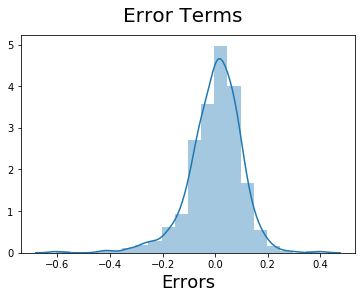

In [175]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

## Step 8: Making Predictions Using the Final Model

In [176]:
#Numerical Variables for scaling, applying it to test set

var = ['temp','atemp','hum','windspeed','cnt']

df_test[var] = scale.transform(df_test[var])

print(df_test.shape)
df_test.head()


(220, 30)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Misty,Partly Cloudy,...,July,June,March,May,Nov,Oct,Sept,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,1,0,...,1,0,0,0,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,1,0,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,1,0,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,1,0,0,0,0,0,0,1,0


In [177]:
# Dividing into X_test and y_test

X_test = df_test
y_test = df_test.pop('cnt')


In [178]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Misty', 'Partly Cloudy', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'August', 'Dec', 'Feb', 'Jan', 'July', 'June',
       'March', 'May', 'Nov', 'Oct', 'Sept', 'spring', 'summer', 'winter'],
      dtype='object')

In [179]:
vif['Features'].value_counts()

temp             1
spring           1
Sept             1
winter           1
yr               1
Partly Cloudy    1
summer           1
July             1
holiday          1
Name: Features, dtype: int64

In [180]:
# Creating X_test_f dataframe by dropping variables from X_test

X_test_f = X_test.drop(['workingday','atemp', 'hum', 'windspeed','Misty', 'Monday', 'Saturday', 'Sunday', 'Thursday','Tuesday', 'Wednesday', 'August', 'Dec', 'Feb', 'Jan', 'June','March', 'May', 'Nov', 'Oct'],axis = 1)

In [181]:
# Checking retained columns:

X_test_f.columns

Index(['yr', 'holiday', 'temp', 'Partly Cloudy', 'July', 'Sept', 'spring',
       'summer', 'winter'],
      dtype='object')

In [182]:
# Adding a constant variable

X_test_newer = sm.add_constant(X_test_f)

In [183]:
# Making predictions

y_pred_new = lr_6.predict(X_test_newer)

In [184]:
# Calculating R-squared score on the test set: 

r2_score_test = r2_score(y_test, y_pred_new)
r2_score_test

0.7917483264887915

In [185]:
# Calculating Mean Squared error value on the test set: 
mse_test = mean_squared_error(y_test, y_pred_new)
mse_test

0.009957403725162193

##  Step 9: Model Evaluation

Text(0, 0.5, 'y_pred_new')

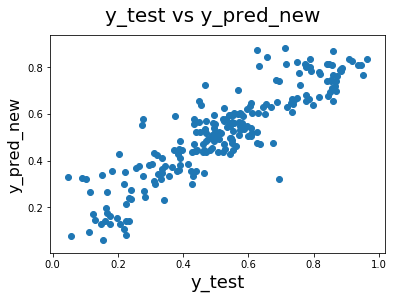

In [186]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_new)
fig.suptitle('y_test vs y_pred_new', fontsize=20)        # Plot heading 
plt.xlabel('y_test', fontsize=18)                        # X-label
plt.ylabel('y_pred_new', fontsize=16)                    # Y-label

In [187]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     219.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.06e-167
Time:                        14:35:24   Log-Likelihood:                 446.82
No. Observations:                 510   AIC:                            -873.6
Df Residuals:                     500   BIC:                            -831.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0522      0.031      1.676

### Best fit line is given by : 
cnt = 0.2364 X yr - 0.0946 X holiday + 0.5068 X temp + 0.0952 X Partly Cloudy - 0.0577 X July + 0.0776 X Sept - 0.0745 X spring + 0.0381 X summer + 0.0752 X winter